In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("emploi.csv")
df.head(2)

,Job Title,Company Name,Job Description,Study Level,Experience Level,Contract Type,Region,Skills,Posting Date,Job Link
0,Business Developer Anglophone​ - Ariana,SMART CONSEIL,NaN,"Bac, Bac+1, Bac+2, Bac+3, Bac+4 & Bac+5 et plus","Etudiant, jeune diplômé et plus","CDI, CDD & Stage",Ariana & International,Gestion d'Équipe - Prospection - Vente,30.11.2024,https://www.emploitunisie.com/offre-emploi-tun...
1,Community Manager - Monastir,TAHRI COMPAGNE,NaN,Bac+3,Débutant < 2 ans et plus,CDI,Monastir,Analyse Marketing - Communication - Communicat...,30.11.2024,https://www.emploitunisie.com/offre-emploi-tun...


In [3]:
df1 = pd.read_csv("keejob.csv")
df1.head()

,Title,Company,Location,Job Type,Job Link,Référence,Publiée le,Type de poste,Lieu de travail,Expérience,Étude,Disponibilité,Langues,Salary,Mobility
0,Conseillers Client,TELEPERFORMANCE,Tunis,CDI,https://www.keejob.com/offres-emploi/211206/co...,211206,29 novembre 2024,CDI,"Centre ville, Tunis, Tunisie",Aucune expérience,Secondaire,Plein temps,Français,NaN,NaN
1,Chargé(e) de Service Clientèle - Sousse,BANK ABC,Tunis,Unspecified,https://www.keejob.com/offres-emploi/210308/ch...,210308,29 novembre 2024,NaN,"Tunis, Tunisie",Moins d'un an,Bac + 3,Plein temps,NaN,NaN,NaN
2,Développeur Java Medior,BINITNS,Tunis,CDI,https://www.keejob.com/offres-emploi/211371/d%...,211371,29 novembre 2024,CDI,"Tunis, Tunisie",Entre 2 et 5 ans,Bac + 5,Plein temps,Français,NaN,NaN
3,Acheteuse,PLASTIC ELECTROMECHANIC COMPANY PEC,Zaghouan,"CDI, ,, CDD",https://www.keejob.com/offres-emploi/211433/ac...,211433,29 novembre 2024,"CDI, ,, CDD","Bir Mcherga, Zaghouan, Tunisie",Entre 2 et 5 ans,Bac + 3,Plein temps,"Français , Anglais",NaN,International
4,Ingénieur Qualité Client,ASTEELFLASH,Ariana,Unspecified,https://www.keejob.com/offres-emploi/212102/in...,212102,29 novembre 2024,NaN,"Ariana, Tunisie",Entre 2 et 5 ans,Bac + 5,Plein temps,"Français , Anglais",1 - 0 DT / Mois,NaN


In [4]:
import pandas as pd

# Load the datasets
df_emploi = pd.read_csv("emploi.csv")
df_keejob = pd.read_csv("keejob.csv")

# Rename columns in df_keejob to match df_emploi
df_keejob.rename(columns={
    "Title": "Job Title",
    "Company": "Company Name",
    "Location": "Region",
    "Job Type": "Contract Type",
    "Publiée le": "Posting Date",
    "Job Link": "Job Link",
    "Étude": "Study Level", 
    "Expérience": "Experience Level"  
}, inplace=True)
print(df_keejob.columns)
# Select and align relevant columns from df_keejob to match df_emploi
df_keejob = df_keejob[["Job Title", "Company Name", "Region", "Contract Type", "Posting Date", "Job Link","Study Level","Experience Level",'Disponibilité', 'Langues', 'Salary', 'Mobility' ]]

# Add missing columns with default values
required_columns = ['Disponibilité', 'Langues', 'Salary', 'Mobility']
for col in required_columns:
    if col not in df_emploi.columns:
        df_emploi[col] = None  # Add column with default value
    if col not in df_keejob.columns:
        df_keejob[col] = None  # Add column with default value

# Ensure the formats of Posting Date are consistent
df_emploi['Posting Date'] = pd.to_datetime(df_emploi['Posting Date'], errors='coerce')
df_keejob['Posting Date'] = pd.to_datetime(df_keejob['Posting Date'], errors='coerce')

combined_df = pd.concat([df_emploi, df_keejob], ignore_index=True)
combined_df = combined_df.drop(columns=['Job Description'])
combined_df.head()

Index(['Job Title', 'Company Name', 'Region', 'Contract Type', 'Job Link',
       'Référence', 'Posting Date', 'Type de poste', 'Lieu de travail',
       'Experience Level', 'Study Level', 'Disponibilité', 'Langues', 'Salary',
       'Mobility'],
      dtype='object')


C:\Users\21692\AppData\Local\Temp\ipykernel_130704\4283265887.py:31: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_emploi['Posting Date'] = pd.to_datetime(df_emploi['Posting Date'], errors='coerce')
C:\Users\21692\AppData\Local\Temp\ipykernel_130704\4283265887.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_keejob['Posting Date'] = pd.to_datetime(df_keejob['Posting Date'], errors='coerce')


,Job Title,Company Name,Study Level,Experience Level,Contract Type,Region,Skills,Posting Date,Job Link,Disponibilité,Langues,Salary,Mobility
0,Business Developer Anglophone​ - Ariana,SMART CONSEIL,"Bac, Bac+1, Bac+2, Bac+3, Bac+4 & Bac+5 et plus","Etudiant, jeune diplômé et plus","CDI, CDD & Stage",Ariana & International,Gestion d'Équipe - Prospection - Vente,2024-11-30,https://www.emploitunisie.com/offre-emploi-tun...,None,None,None,None
1,Community Manager - Monastir,TAHRI COMPAGNE,Bac+3,Débutant < 2 ans et plus,CDI,Monastir,Analyse Marketing - Communication - Communicat...,2024-11-30,https://www.emploitunisie.com/offre-emploi-tun...,None,None,None,None
2,Docteur en Data Science ou en Informatique - A...,SMART CONSEIL,Bac+5 et plus,Expérience entre 2 ans et 5 ans et plus,CDI - CDD,Ariana - Béja - Ben Arous - Bizerte - Gabès - ...,NaN,2024-11-30,https://www.emploitunisie.com/offre-emploi-tun...,None,None,None,None
3,Formation en Data Engineer (F/H) - Paris,KAISCHOOL,"Bac+3, Bac+4 & Bac+5 et plus","Etudiant, jeune diplômé et plus",Alternance,International,APACHE - BIG DATA - Comptabilité - Finance - G...,2024-11-30,https://www.emploitunisie.com/offre-emploi-tun...,None,None,None,None
4,Consultant Fonctionnel Sage XRT ou Sage FRP 10...,DELTASOFT INTERNATIONAL,Bac+5 et plus,Expérience entre 2 ans et 5 ans,CDI - Statutaire,Ariana - Béja - Ben Arous - Bizerte - Gabès - ...,Comptabilité - Finance - Gestion - SAGE - TMS ...,2024-11-30,https://www.emploitunisie.com/offre-emploi-tun...,None,None,None,None


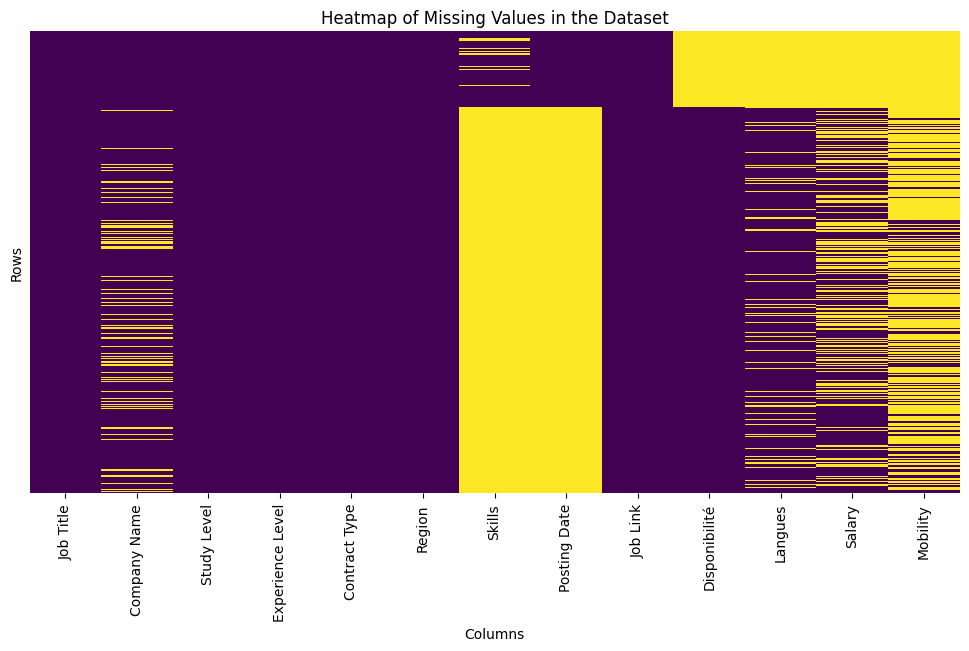

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame indicating missing values (True for missing, False for non-missing)
missing_values = combined_df.isnull()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(missing_values, cmap="viridis", cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values in the Dataset")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


In [6]:
print(combined_df.shape)

(1482, 13)


In [7]:
# Clean the contract types by stripping spaces and replacing unwanted characters
combined_df["Contract Type"] = combined_df["Contract Type"].str.strip()  # Remove leading/trailing spaces

# Remove commas, replace them with nothing (i.e., strip commas)
combined_df["Contract Type"] = combined_df["Contract Type"].str.replace(",", "", regex=False)

# Replace '&' and '/' with '-'
combined_df["Contract Type"] = combined_df["Contract Type"].str.replace(" & ", "-", regex=False)  # Replace '&' with '-'
combined_df["Contract Type"] = combined_df["Contract Type"].str.replace(" / ", "-", regex=False)  # Replace ' / ' with '-'
combined_df["Contract Type"] = combined_df["Contract Type"].str.replace("/", "-", regex=False)  # Replace ' / ' with '-'

# Split the "Contract Type" column by '-' and then flatten the values
split_contract_types = combined_df["Contract Type"].str.split("-", expand=True).stack()

# Drop any empty or NaN values and remove extra spaces
split_contract_types = split_contract_types[split_contract_types.str.strip() != '']

# Further split by spaces to make the contract types more logical
split_contract_types = split_contract_types.str.split(" ", expand=True).stack()

# Normalize by stripping any remaining spaces
split_contract_types = split_contract_types.str.strip()

# Get the unique contract types and sort them
unique_contract_types = sorted(split_contract_types.unique())

print(unique_contract_types[1:])


['Alternance', 'CDD', 'CDI', 'Fonction', 'Freelance', 'Indépendant', 'Intérim', 'PFE', 'SIVP', 'Saisonnier', 'Stage', 'Statutaire', 'Temps', 'Unspecified', 'partiel', 'publique']


In [8]:
unique_contract_types=['Alternance', 'CDD', 'CDI', 'Fonction publique', 'Indépendant-Freelance', 'Intérim', 'Stage-PFE', 'SIVP', 'Saisonnier', 'Stage', 'Statutaire', 'Temps partiel', 'Unspecified']

                       Count
CDI                      799
CDD                      770
SIVP                     482
Unspecified              159
Stage                     62
Intérim                   31
Stage-PFE                 27
Indépendant-Freelance     25
Temps partiel             18
Saisonnier                13
Alternance                 9
Statutaire                 8
Fonction publique          2


C:\Users\21692\AppData\Local\Temp\ipykernel_130704\2654265261.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contract_type_summary_df.index, y=contract_type_summary_df["Count"], palette="viridis")


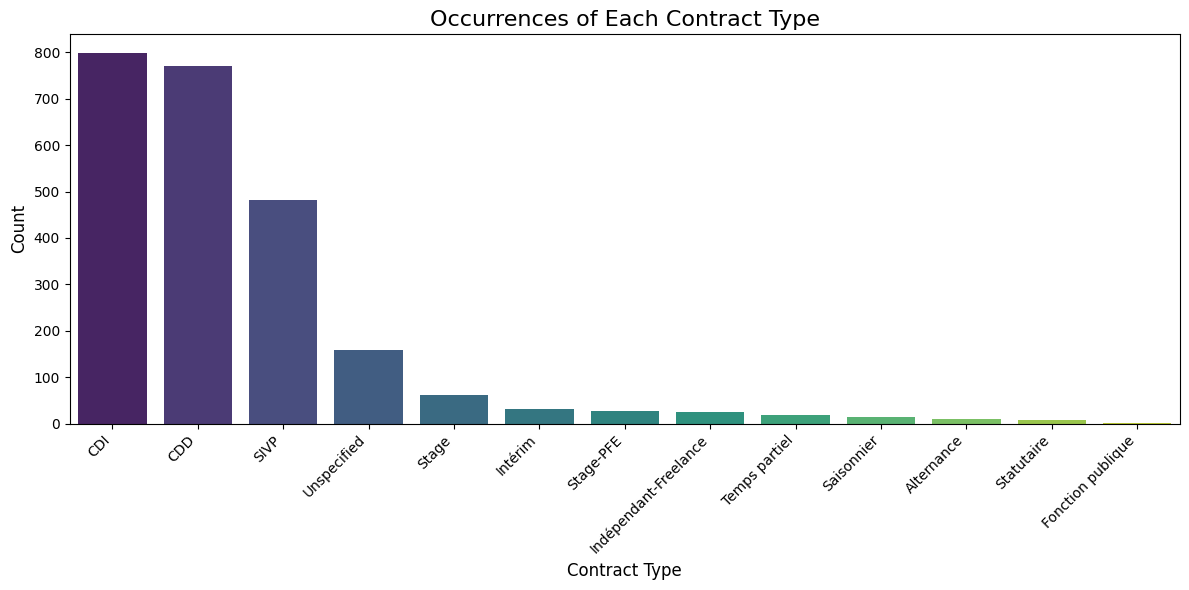

In [9]:
# Initialize a dictionary to store counts for each contract type
contract_type_summary = {}

# Iterate through the unique contract types
for contract_type in unique_contract_types:
    # Check if the current contract type is present in each row
    count = combined_df["Contract Type"].str.contains(contract_type, na=False).sum()
    # Store the count in the dictionary
    contract_type_summary[contract_type] = count

# Convert the summary to a DataFrame for visualization
contract_type_summary_df = pd.DataFrame.from_dict(contract_type_summary, orient="index", columns=["Count"])
contract_type_summary_df = contract_type_summary_df.sort_values(by="Count", ascending=False)

# Display the DataFrame
print(contract_type_summary_df)

# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=contract_type_summary_df.index, y=contract_type_summary_df["Count"], palette="viridis")
plt.title("Occurrences of Each Contract Type", fontsize=16)
plt.xlabel("Contract Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


Français       1020
Arabe           654
Anglais         554
Italien          29
Allemand         17
Espagnol         10
Portugais         5
Néerlandais       2
Russe             2
Chinois           1
Japonais          1
Name: count, dtype: int64


C:\Users\21692\AppData\Local\Temp\ipykernel_130704\1376053518.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


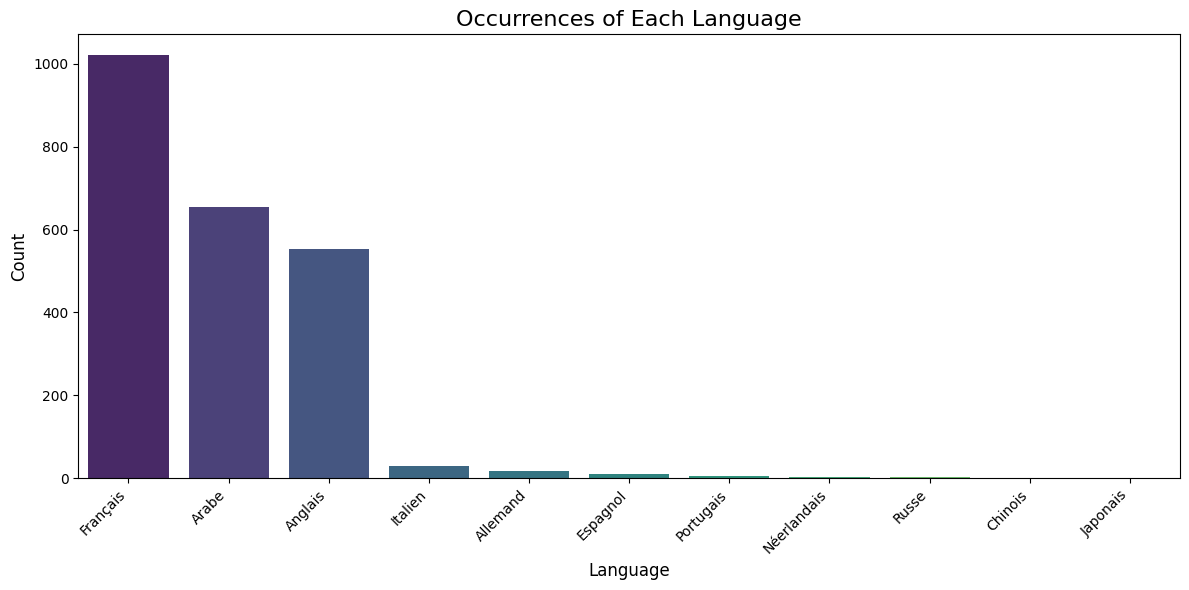

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split the "Langues" column into individual languages, stack, and strip whitespace
all_languages = combined_df["Langues"].str.split(",", expand=True).stack().str.strip()

# Count occurrences of each unique language
language_counts = all_languages.value_counts()

# Display the counts
print(language_counts)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Occurrences of Each Language", fontsize=16)
plt.xlabel("Language", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


Tunis            532
Ariana           330
Ben Arous        193
Sousse           134
Zaghouan          96
Bizerte           88
Nabeul            68
Béja              58
Sfax              57
Gabès             49
Jendouba          49
Manouba           49
Gafsa             48
International     34
Monastir          28
Médenine          17
Kairouan          10
Gabes              8
Mahdia             6
Le Kef             2
Siliana            1
Abidjan            1
DAKAR              1
TRIPOLI            1
Tozeur             1
Sidi Bouzid        1
Tataouine          1
Name: count, dtype: int64


C:\Users\21692\AppData\Local\Temp\ipykernel_130704\4106310275.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="coolwarm")


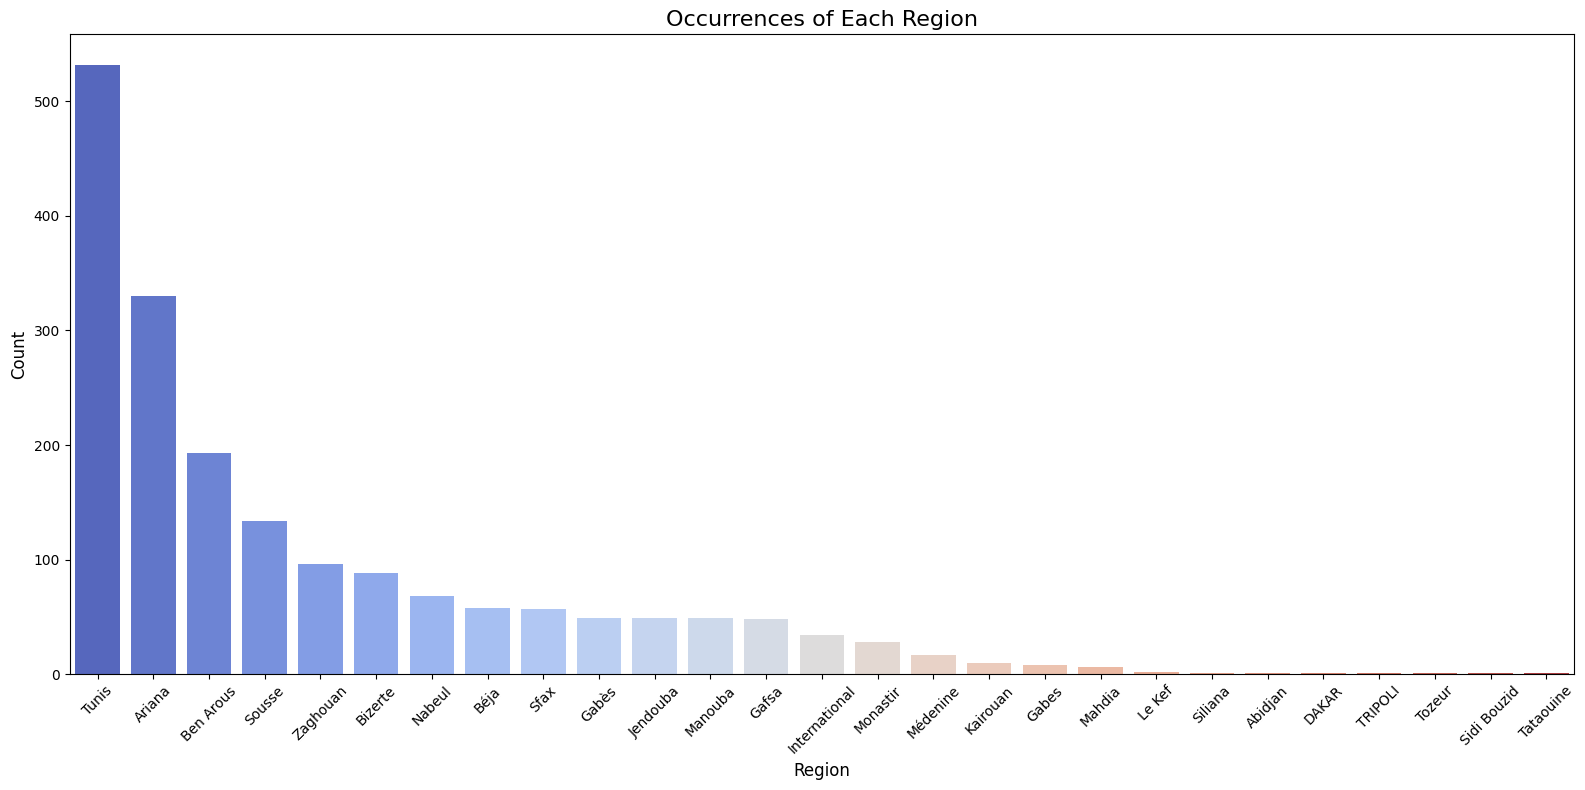

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split the "Region" column into individual regions, stack, and strip whitespace
all_regions = combined_df["Region"].str.split(" - | & |, ", expand=True).stack().str.strip()

# Standardize the names to unify similar regions
all_regions.replace({"La Manouba": "Manouba"}, inplace=True)

# Count occurrences of each unique region
region_counts = all_regions.value_counts()

# Display the counts
print(region_counts)

# Plot the results
plt.figure(figsize=(16, 8))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="coolwarm")
plt.title("Occurrences of Each Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
# Clean the contract types by stripping spaces and replacing unwanted characters
combined_df["Study Level"] = combined_df["Study Level"].str.strip()  # Remove leading/trailing spaces

# Remove commas, replace them with nothing (i.e., strip commas)
combined_df["Study Level"] = combined_df["Study Level"].str.replace(",", "", regex=False)

# Replace '&' and '/' with '-'
combined_df["Study Level"] = combined_df["Study Level"].str.replace(" & ", "-", regex=False)  # Replace '&' with '-'
combined_df["Study Level"] = combined_df["Study Level"].str.replace(" / ", "-", regex=False)  # Replace ' / ' with '-'
combined_df["Study Level"] = combined_df["Study Level"].str.replace("/", "-", regex=False)  # Replace ' / ' with '-'

# Split the "Contract Type" column by '-' and then flatten the values
split_Study_Levels = combined_df["Study Level"].str.split("-", expand=True).stack()

# Drop any empty or NaN values and remove extra spaces
split_Study_Levels = split_Study_Levels[split_Study_Levels.str.strip() != '']

# Further split by spaces to make the contract types more logical
split_Study_Levels = split_Study_Levels.str.split(" ", expand=True).stack()


# Normalize by stripping any remaining spaces
split_Study_Levels = split_Study_Levels.str.strip()

# Get the unique contract types and sort them
unique_Study_Levels = sorted(split_Study_Levels.unique())

# Display the unique contract types
print(unique_Study_Levels)


['', '+', '1', '2', '3', '4', '5', 'Bac', 'Bac+1', 'Bac+2', 'Bac+3', 'Bac+4', 'Bac+5', 'Doctorat', 'Expert', 'Formations', 'Primaire', 'Qualification', 'Recherche', 'Secondaire', 'avant', 'bac', 'et', 'plus', 'professionnelles']


In [14]:
unique_Study_Levels = ['Bac', 'Bac+1', 'Bac+2', 'Bac+3', 'Bac+4', 'Bac+5', 'Doctorat', 'Expert Recherche', 'Primaire', 'Secondaire', 'Qualification avant bac', 'et plus', 'Formations professionnelles']


Nombre d'offres par niveau d'étude :
Bac: 148
Bac+1: 86
Bac+2: 199
Bac+3: 775
Bac+4: 193
Bac+5: 395
Qualification avant bac: 56
Formations professionnelles: 93
Autres: 162


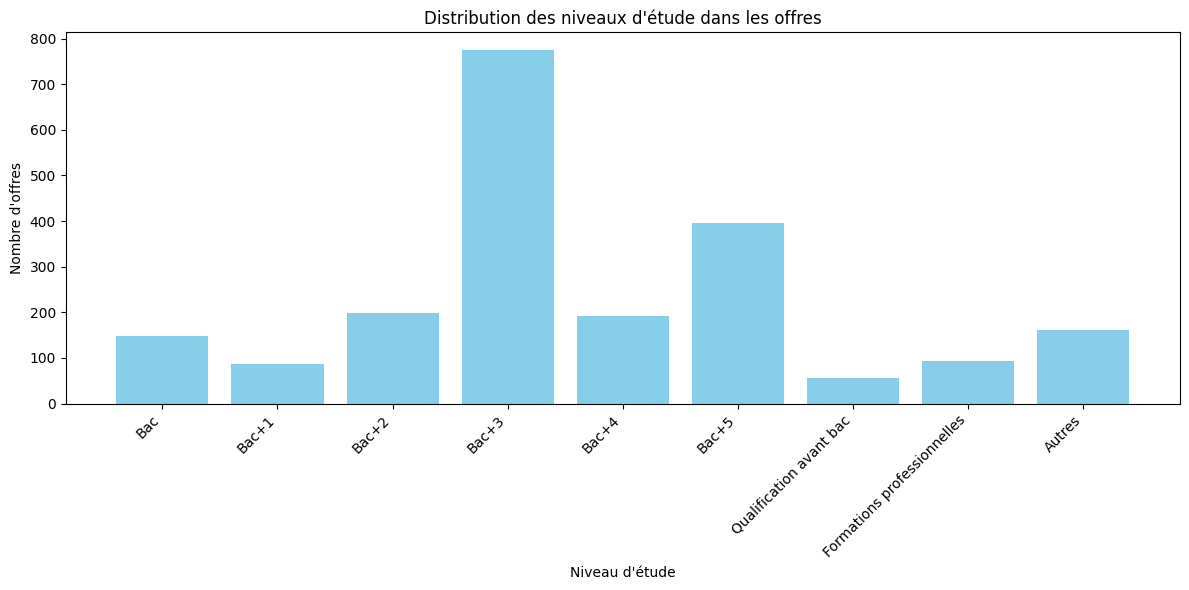

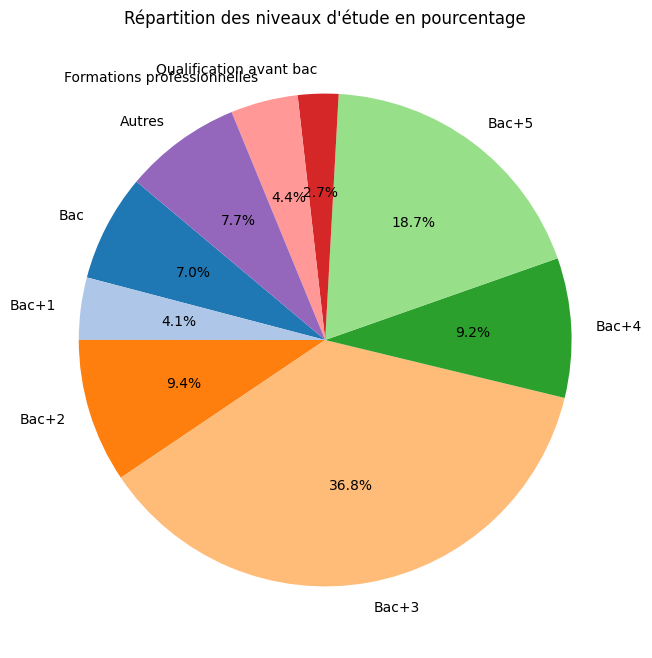

In [17]:
import re
import matplotlib.pyplot as plt

# Initialisation du dictionnaire pour stocker les regroupements
study_level_counts = {}

# Boucle pour compter les niveaux d'études
for level in unique_Study_Levels:
    if "Bac+" in level:  # Niveaux "Bac+N"
        count_spaces = combined_df[combined_df["Study Level"].str.contains(r'\bBac\s*\+\s*' + re.escape(level.split('+')[1]) + r'\b', case=False, na=False)].shape[0]
        total_count = count_spaces
        study_level_counts[level] = total_count
    elif "Bac" in level:  # Niveau "Bac" (sans Bac+)
        count_bac = combined_df[combined_df["Study Level"].str.contains(r'\bBac\b', case=False, na=False) & 
                               ~combined_df["Study Level"].str.contains(r'\bBac\s*\+', case=False, na=False)].shape[0]
        study_level_counts['Bac'] = count_bac
    else:
        count = combined_df[combined_df["Study Level"].str.contains(r'\b' + re.escape(level) + r'\b', case=False, na=False)].shape[0]
        study_level_counts[level] = count

# Regrouper les catégories demandées
study_level_counts["Qualification avant bac"] += study_level_counts.pop("Secondaire", 0)

autres_categories = ["Primaire", "Expert Recherche", "et plus", "Doctorat"]
study_level_counts["Autres"] = sum([study_level_counts.pop(cat, 0) for cat in autres_categories])

# Affichage des résultats
print("Nombre d'offres par niveau d'étude :")
for level, count in study_level_counts.items():
    print(f"{level}: {count}")

# Préparer les données pour le graphique
study_levels = list(study_level_counts.keys())
counts = list(study_level_counts.values())

# Diagramme en barres
plt.figure(figsize=(12, 6))
plt.bar(study_levels, counts, color='skyblue')
plt.xlabel('Niveau d\'étude')
plt.ylabel('Nombre d\'offres')
plt.title('Distribution des niveaux d\'étude dans les offres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Diagramme en secteurs
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=study_levels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Répartition des niveaux d\'étude en pourcentage')
plt.show()


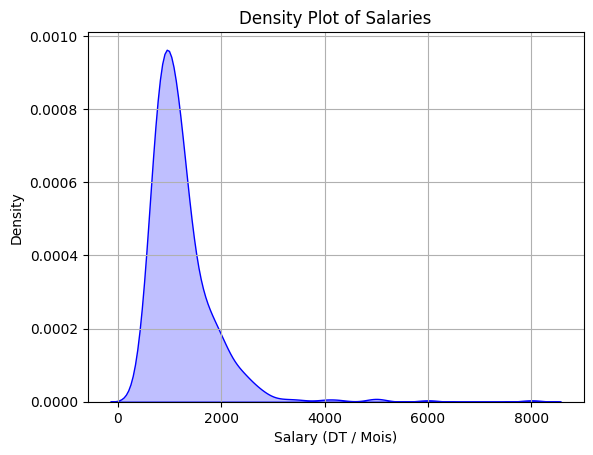

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to process the salary column
def process_salary(salary):
    if salary is None or pd.isna(salary) or "DT / Mois" not in salary:
        return np.nan
    salary = salary.replace(" DT / Mois", "").replace(",", ".")
    if "-" in salary:
        try:
            low, high = map(float, salary.split(" - "))
            if low <= 100 or high <= 100:  # Outliers
                return np.nan
            return (low + high) / 2
        except ValueError:
            return np.nan
    else:
        try:
            value = float(salary)
            if value <= 100:  # Outliers
                return np.nan
            return value
        except ValueError:
            return np.nan

# Apply the processing
combined_df["Processed_Salary"] = combined_df["Salary"].apply(process_salary)

# Select only valid values (ignoring NaN in plotting)
valid_salaries = combined_df["Processed_Salary"]

# Plot the density (NaN values are automatically ignored)
sns.kdeplot(valid_salaries, fill=True, color="blue")
plt.title("Density Plot of Salaries")
plt.xlabel("Salary (DT / Mois)")
plt.ylabel("Density")
plt.grid(True)
plt.show()


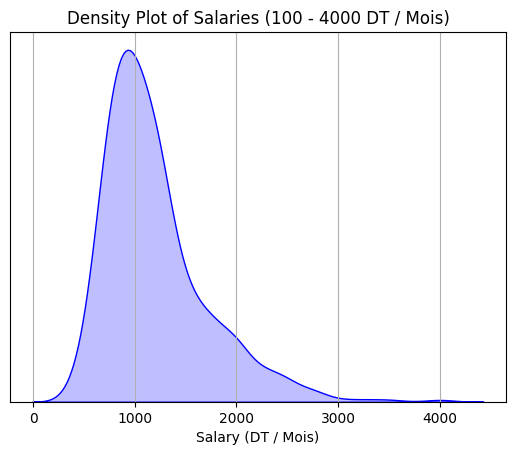

In [20]:
filtered_salaries = valid_salaries[(valid_salaries >= 100) & (valid_salaries <= 4000)]

# Tracer le graphique
sns.kdeplot(filtered_salaries, fill=True, color="blue")
plt.title("Density Plot of Salaries (100 - 4000 DT / Mois)")
plt.xlabel("Salary (DT / Mois)")
plt.ylabel("")  # Suppression des labels de l'axe Y
plt.yticks([])  # Suppression des ticks de l'axe Y
plt.grid(True)
plt.show()

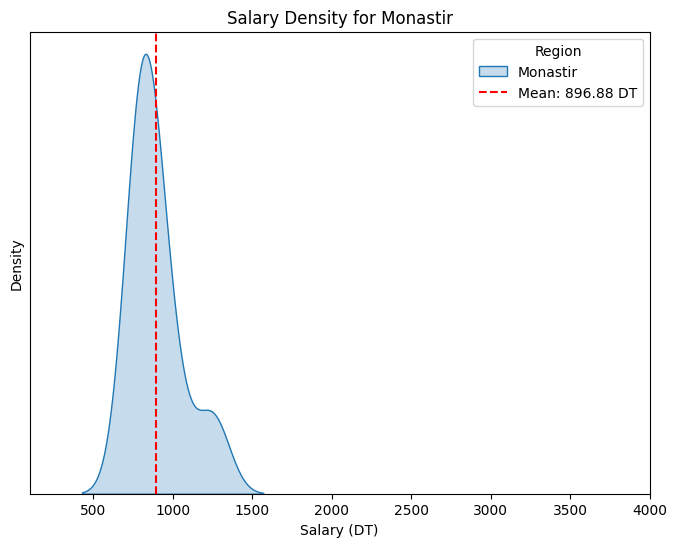

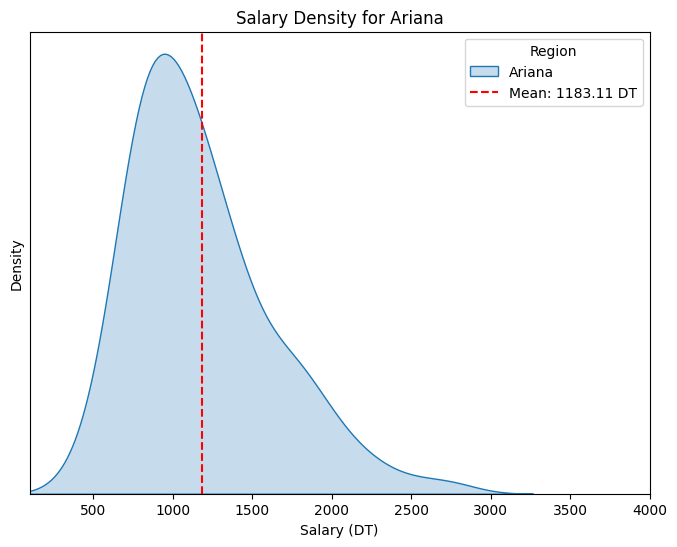

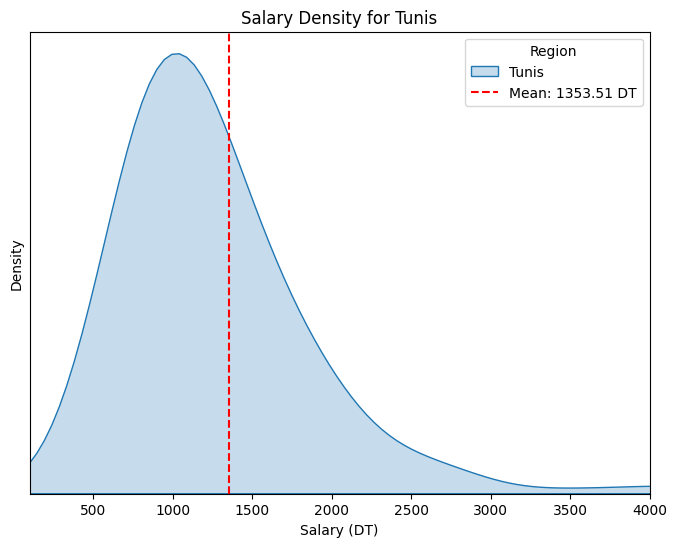

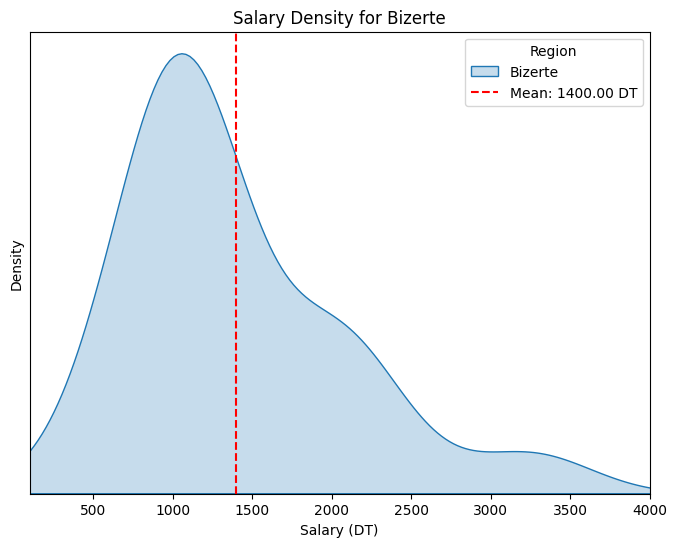

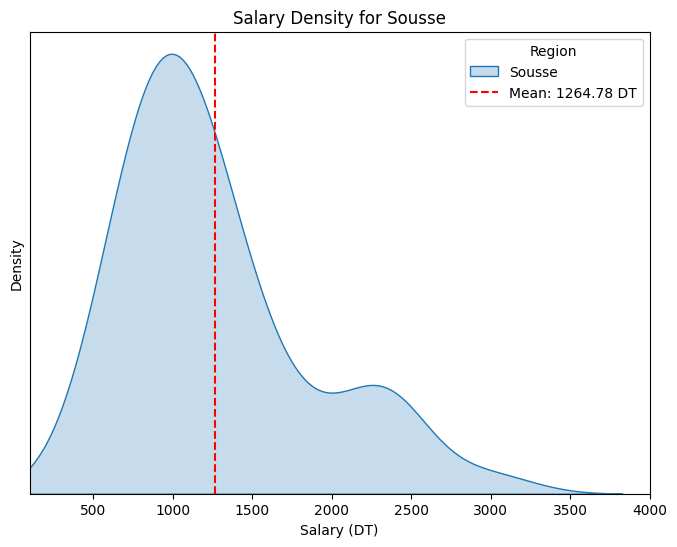

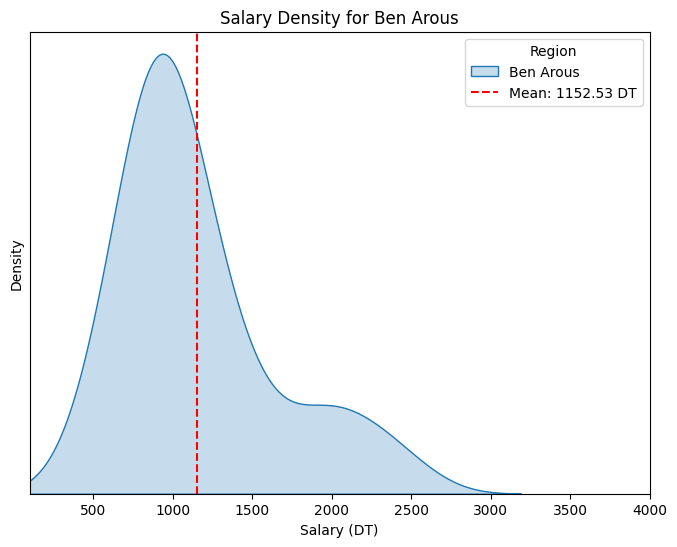

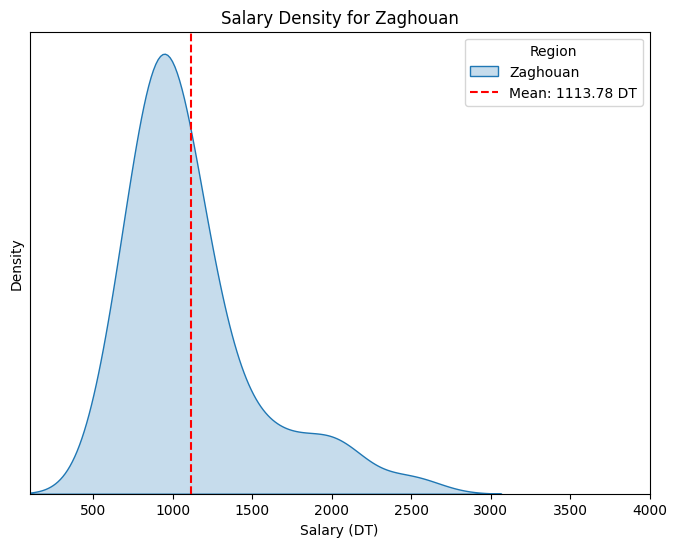

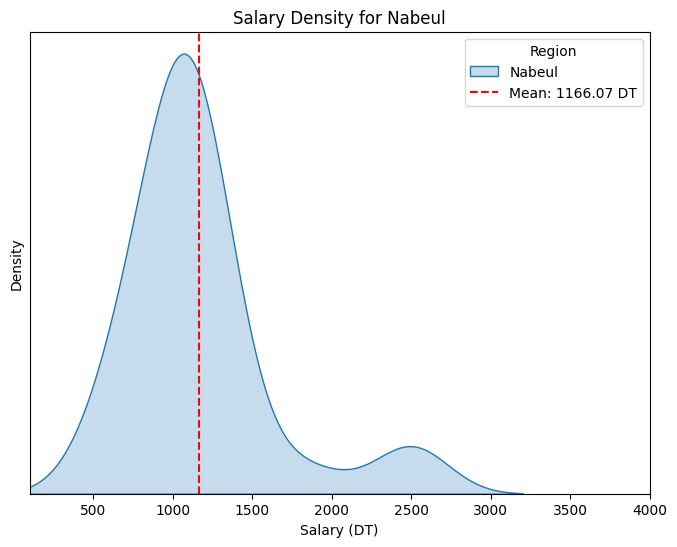

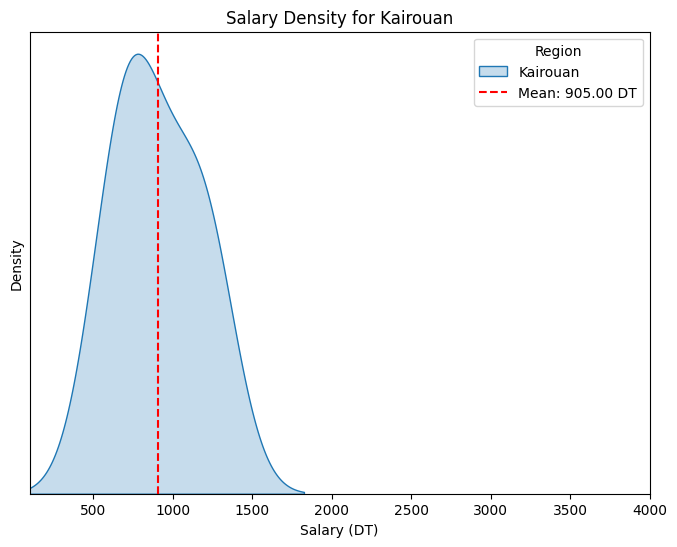

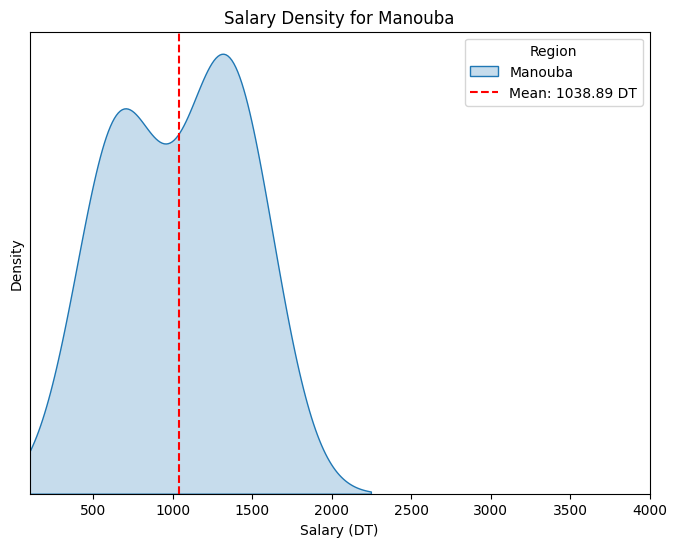

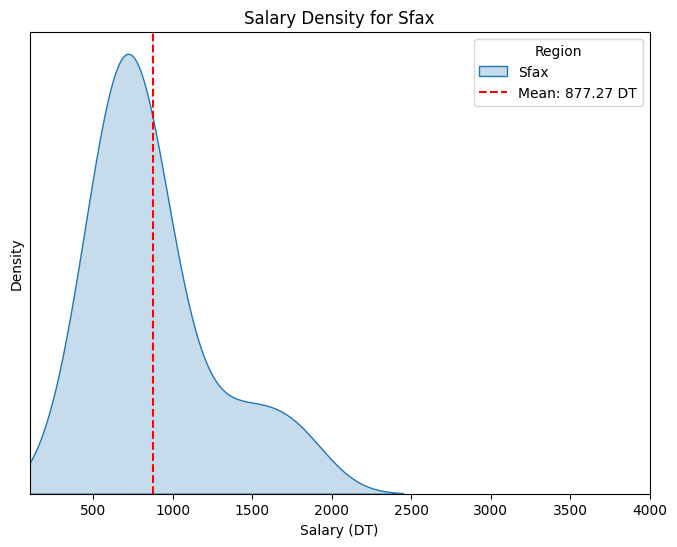

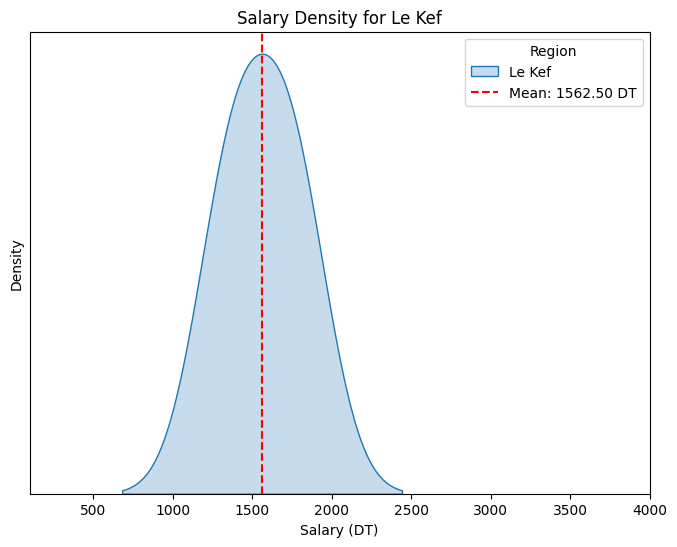

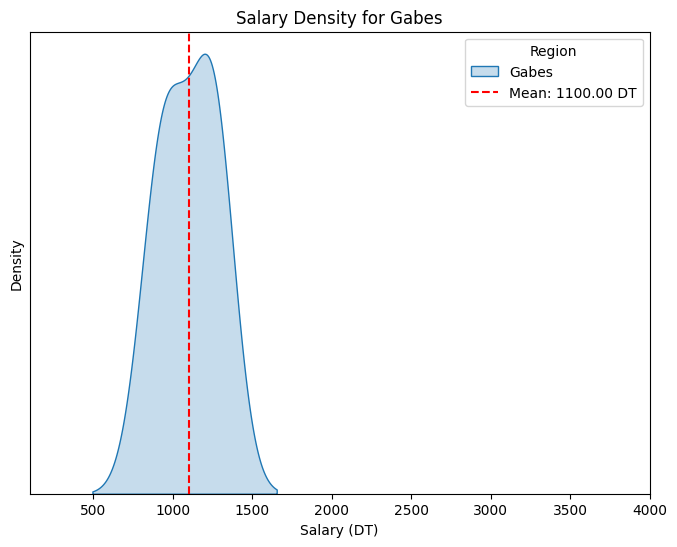

C:\Users\21692\AppData\Local\Temp\ipykernel_130704\3870575083.py:51: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(region_data['Processed_Salary'], label=region, fill=True)


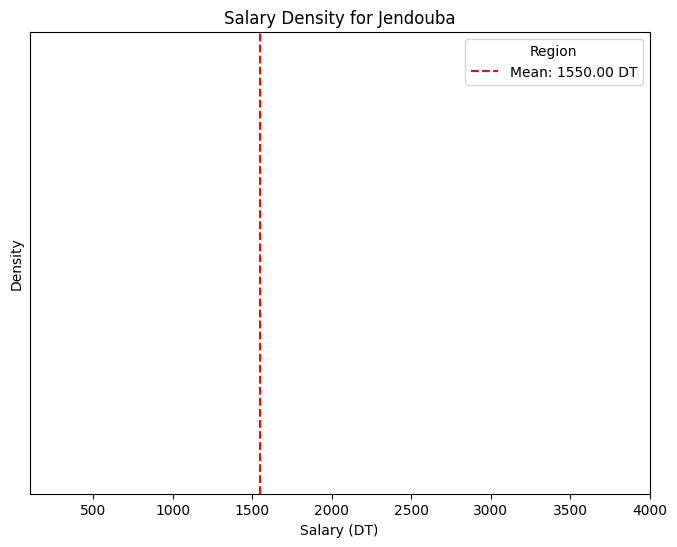

C:\Users\21692\AppData\Local\Temp\ipykernel_130704\3870575083.py:51: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(region_data['Processed_Salary'], label=region, fill=True)


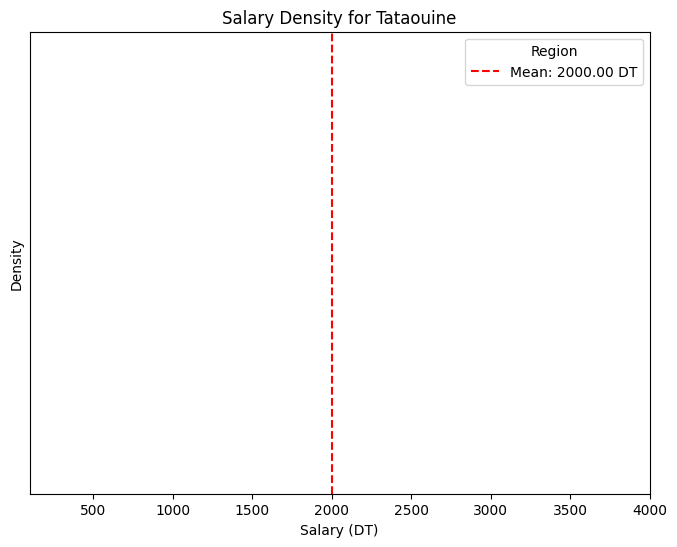

C:\Users\21692\AppData\Local\Temp\ipykernel_130704\3870575083.py:51: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(region_data['Processed_Salary'], label=region, fill=True)


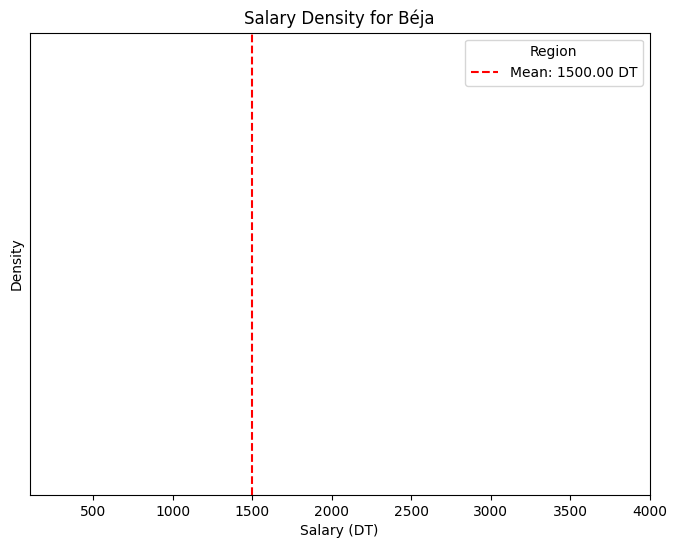

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Process the salary function
def process_salary(salary):
    if salary is None or pd.isna(salary) or "DT / Mois" not in salary:
        return np.nan
    salary = salary.replace(" DT / Mois", "").replace(",", ".")
    if "-" in salary:
        try:
            low, high = map(float, salary.split(" - "))
            if low <= 100 or high <= 100:  # Outliers
                return np.nan
            return (low + high) / 2
        except ValueError:
            return np.nan
    else:
        try:
            value = float(salary)
            if value <= 100:  # Outliers
                return np.nan
            return value
        except ValueError:
            return np.nan

# Apply the processing on the salary column
combined_df["Processed_Salary"] = combined_df["Salary"].apply(process_salary)

# Filter out rows with invalid salary data
valid_salaries = combined_df.dropna(subset=["Processed_Salary"])

# Split the "Region" column into individual regions, stack, and strip whitespace
all_regions = valid_salaries["Region"].str.split(" - | & |, ", expand=True).stack().str.strip()

# Standardize region names
all_regions.replace({"La Manouba": "Manouba"}, inplace=True)

# Create a separate plot for each region
for region in all_regions.unique():
    # Filter rows with the specific region
    region_data = valid_salaries[valid_salaries["Region"].str.contains(region, case=False, na=False)]
    
    # Check if there are valid salaries for this region
    if region_data['Processed_Salary'].notna().any():
        # Create a new figure for each region
        plt.figure(figsize=(8, 6))
        
        # Plot the density of the region's salary
        sns.kdeplot(region_data['Processed_Salary'], label=region, fill=True)
        
        # Calculate the mean salary for the region
        region_mean = region_data['Processed_Salary'].mean()

        # Add a vertical line for the mean salary
        plt.axvline(region_mean, color='red', linestyle='--', label=f'Mean: {region_mean:.2f} DT')

        # Customize the plot
        plt.title(f'Salary Density for {region}')
        plt.xlabel('Salary (DT)')
        plt.ylabel('Density')
        plt.xlim(100, 4000)  # Limit the salary range for the plot
        plt.legend(title='Region')

        # Remove y-axis labels
        plt.yticks([])

        # Display the plot
        plt.show()


In [25]:
import pandas as pd

# Count valid salary values for each region
valid_salary_counts = {}

for region in all_regions.unique():
    # Filter rows with the specific region
    region_data = valid_salaries[valid_salaries["Region"].str.contains(region, case=False, na=False)]
    
    # Count the valid salary values for this region (non-NaN values)
    valid_count = region_data['Processed_Salary'].notna().sum()
    
    # Store the result in the dictionary
    valid_salary_counts[region] = valid_count

# Print the counts for each region
for region, count in valid_salary_counts.items():
    print(f"Region: {region} - Valid Salary Values: {count}")


Region: Monastir - Valid Salary Values: 8
Region: Ariana - Valid Salary Values: 114
Region: Tunis - Valid Salary Values: 207
Region: Bizerte - Valid Salary Values: 17
Region: Sousse - Valid Salary Values: 44
Region: Ben Arous - Valid Salary Values: 43
Region: Zaghouan - Valid Salary Values: 47
Region: Nabeul - Valid Salary Values: 28
Region: Kairouan - Valid Salary Values: 5
Region: Manouba - Valid Salary Values: 9
Region: Sfax - Valid Salary Values: 11
Region: Le Kef - Valid Salary Values: 2
Region: Gabes - Valid Salary Values: 4
Region: Jendouba - Valid Salary Values: 1
Region: Tataouine - Valid Salary Values: 1
Region: Béja - Valid Salary Values: 1


Nombre d'offres par niveau d'étude :
Bac: 148
1: 86
2: 199
3: 775
4: 193
5: 395
Qualification avant bac: 56
Formations professionnelles: 93
Autres: 162
249                         Bac + 5
250                         Bac + 2
253     Formations professionnelles
260                         Bac + 3
263     Formations professionnelles
                   ...             
1470                        Bac + 3
1473                        Bac + 5
1475                        Bac + 3
1476                        Bac + 3
1481                        Bac + 3
Name: Study Level, Length: 542, dtype: object


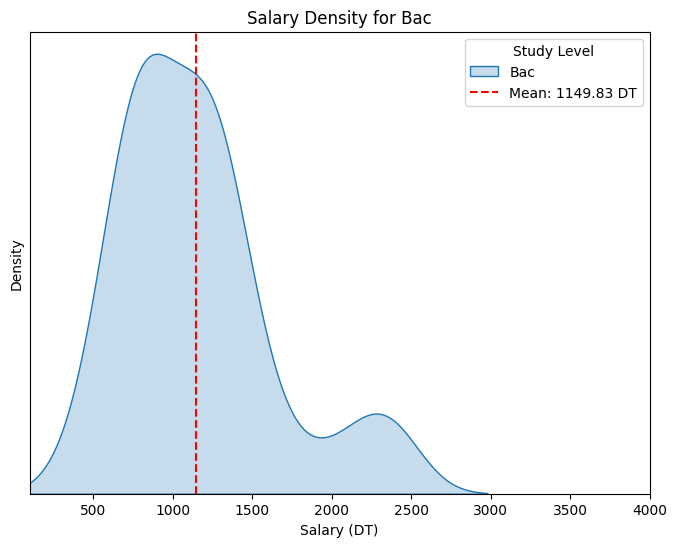

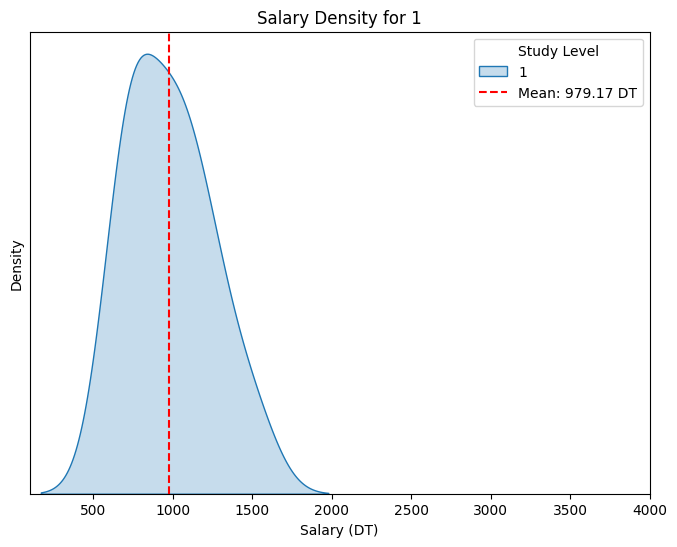

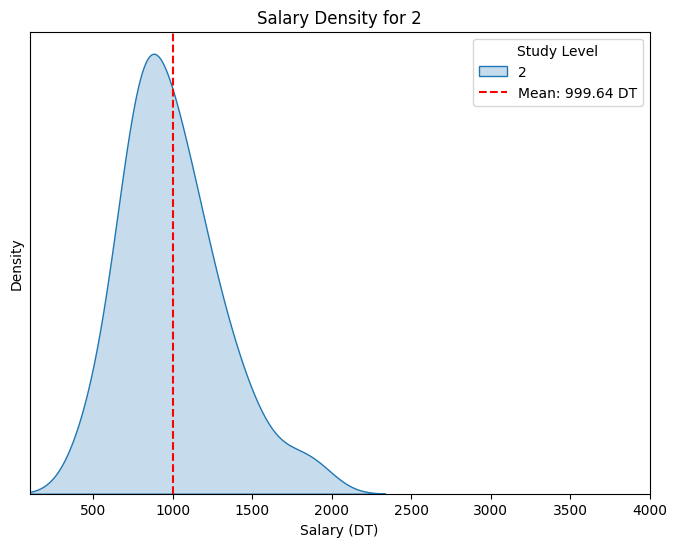

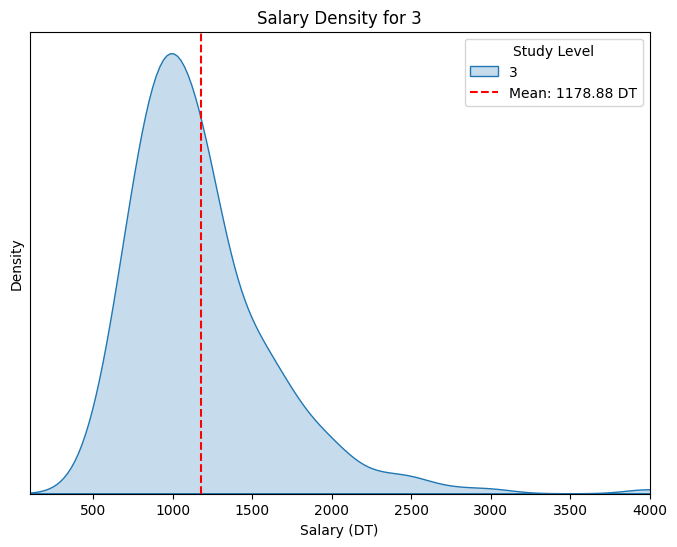

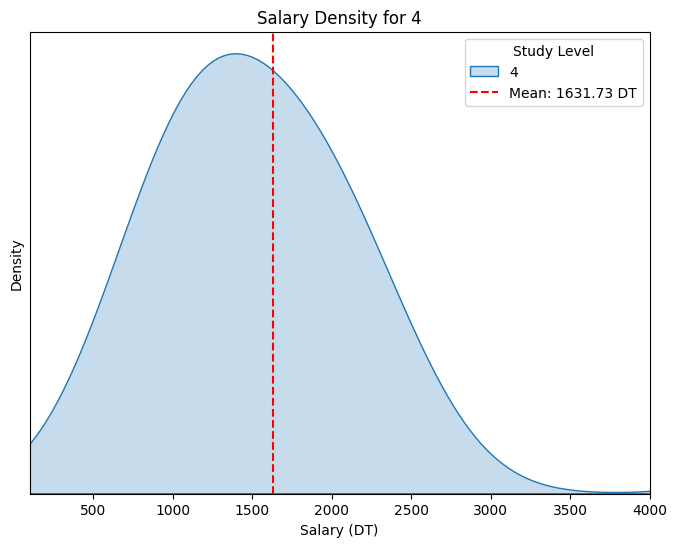

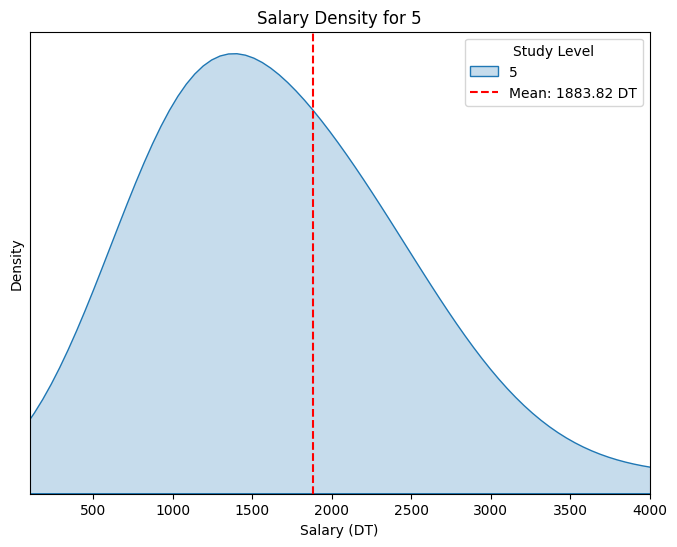

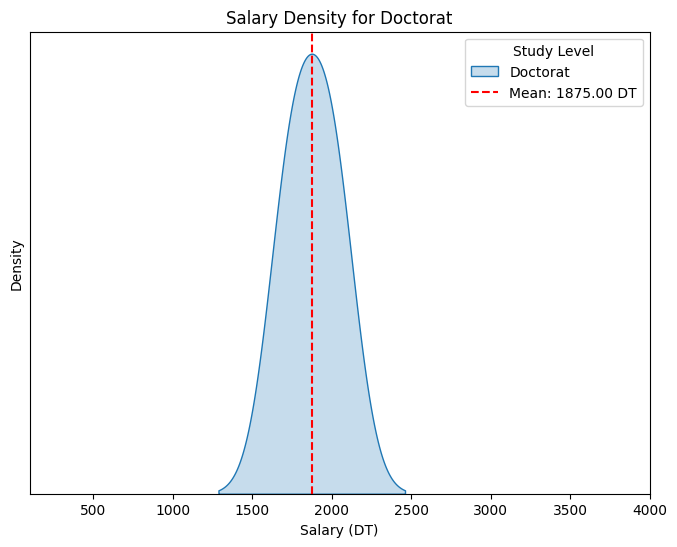

C:\Users\21692\AppData\Local\Temp\ipykernel_130704\123083215.py:85: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(study_level_data['Processed_Salary'], label=level, fill=True)


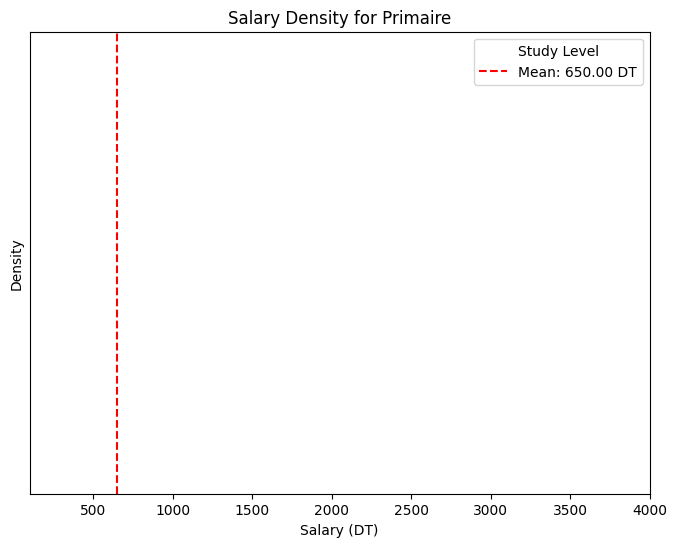

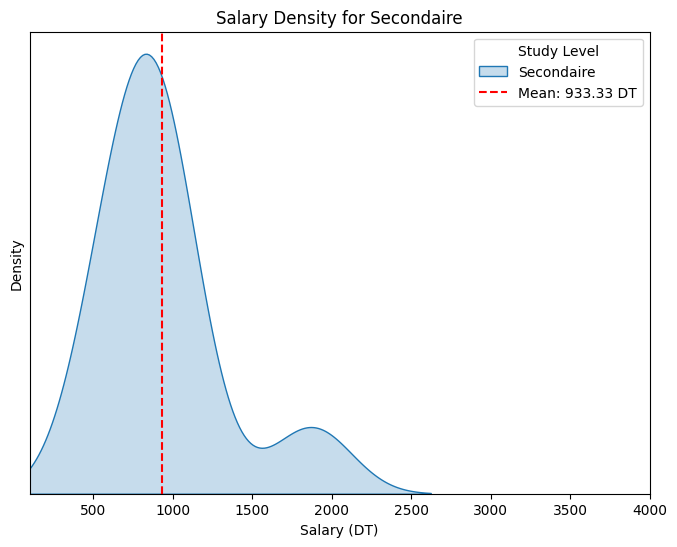

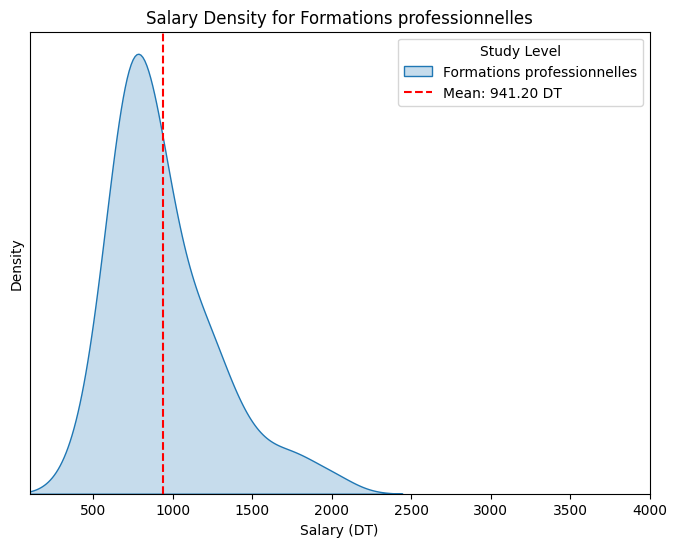

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

# Process the salary function
def process_salary(salary):
    if salary is None or pd.isna(salary) or "DT / Mois" not in salary:
        return np.nan
    salary = salary.replace(" DT / Mois", "").replace(",", ".")
    if "-" in salary:
        try:
            low, high = map(float, salary.split(" - "))
            if low <= 100 or high <= 100:  # Outliers
                return np.nan
            return (low + high) / 2
        except ValueError:
            return np.nan
    else:
        try:
            value = float(salary)
            if value <= 100:  # Outliers
                return np.nan
            return value
        except ValueError:
            return np.nan

# Apply the processing on the salary column
combined_df["Processed_Salary"] = combined_df["Salary"].apply(process_salary)

# Filter out rows with invalid salary data
valid_salaries = combined_df.dropna(subset=["Processed_Salary"])

# List of unique study levels
unique_Study_Levels = ['Bac', '1', '2', '3', '4', '5', 'Doctorat', 'Expert Recherche', 
                       'Primaire', 'Secondaire', 'Qualification avant bac', 'et plus', 'Formations professionnelles']

# Initialize the dictionary to store study level counts
study_level_counts = {}

# Separate Bac and Bac+ levels correctly
for level in unique_Study_Levels:
    if "Bac+" in level:  # Bac+ levels
        count_spaces = combined_df[combined_df["Study Level"].str.contains(r'\bBac\s*\+\s*' + re.escape(level.split('+')[1]) + r'\b', case=False, na=False)].shape[0]
        study_level_counts[level] = count_spaces
    elif "Bac" in level:  # Bac level without Bac+
        count_bac = combined_df[combined_df["Study Level"].str.contains(r'\bBac\b', case=False, na=False) & 
                               ~combined_df["Study Level"].str.contains(r'\bBac\s*\+', case=False, na=False)].shape[0]
        study_level_counts['Bac'] = count_bac
    else:  # Other levels
        count = combined_df[combined_df["Study Level"].str.contains(r'\b' + re.escape(level) + r'\b', case=False, na=False)].shape[0]
        study_level_counts[level] = count

# Merge the secondary category "Secondaire" into "Qualification avant bac"
study_level_counts["Qualification avant bac"] += study_level_counts.pop("Secondaire", 0)

# Aggregate other categories into "Autres"
autres_categories = ["Primaire", "Expert Recherche", "et plus", "Doctorat"]
study_level_counts["Autres"] = sum([study_level_counts.pop(cat, 0) for cat in autres_categories])

# Display study level counts
print("Nombre d'offres par niveau d'étude :")
for level, count in study_level_counts.items():
    print(f"{level}: {count}")

print(valid_salaries["Study Level"])

# Create a separate plot for each study level's salary distribution
# Loop through each study level for plotting
for level in unique_Study_Levels:
    # Special handling for the "Bac" level to exclude "Bac+" levels
    if level == "Bac":
        study_level_data = valid_salaries[valid_salaries["Study Level"].str.contains(r'\bBac\b', case=False, na=False) & 
                                         ~valid_salaries["Study Level"].str.contains(r'\bBac\s*\+', case=False, na=False)]
    else:
        study_level_data = valid_salaries[valid_salaries["Study Level"].str.contains(level, case=False, na=False)]

    # Check if there are valid salaries for this study level
    if study_level_data['Processed_Salary'].notna().any():
        # Create a new figure for each study level
        plt.figure(figsize=(8, 6))

        # Plot the density of the study level's salary
        sns.kdeplot(study_level_data['Processed_Salary'], label=level, fill=True)

        # Calculate the mean salary for the study level
        level_mean = study_level_data['Processed_Salary'].mean()

        # Add a vertical line for the mean salary
        plt.axvline(level_mean, color='red', linestyle='--', label=f'Mean: {level_mean:.2f} DT')

        # Customize the plot
        plt.title(f'Salary Density for {level}')
        plt.xlabel('Salary (DT)')
        plt.ylabel('Density')
        plt.xlim(100, 4000)  # Limit the salary range for the plot
        plt.legend(title='Study Level')

        # Remove y-axis labels
        plt.yticks([])

        # Display the plot
        plt.show()



In [36]:
import re

# Count valid salary values for each study level
valid_salary_counts_study_level = {}

for level in unique_Study_Levels:
    # Check for Bac+ levels specifically
    if "Bac+" in level:
        # Match the specific "Bac+X" level (e.g., Bac+1, Bac+2, etc.)
        count_bac_plus = valid_salaries[valid_salaries["Study Level"].str.contains(r'\bBac\s*\+\s*' + re.escape(level.split('+')[1]) + r'\b', case=False, na=False)].shape[0]
        valid_salary_counts_study_level[level] = count_bac_plus
    else:
        # For regular levels (like Bac, Doctorat, etc.), match those
        count = valid_salaries[valid_salaries["Study Level"].str.contains(r'\b' + re.escape(level) + r'\b', case=False, na=False)].shape[0]
        valid_salary_counts_study_level[level] = count

# For Bac (without Bac+), subtract Bac+ levels' counts
bac_count = valid_salary_counts_study_level.get('Bac', 0)
for i in range(1, 6):  # Bac+1 to Bac+5
    bac_plus_level = f'Bac+{i}'
    bac_count -= valid_salary_counts_study_level.get(bac_plus_level, 0)

valid_salary_counts_study_level['Bac'] = bac_count

# Print the counts for each study level
for level, count in valid_salary_counts_study_level.items():
    print(f"Study Level: {level} - Valid Salary Values: {count}")


Study Level: Bac - Valid Salary Values: 58
Study Level: Bac+1 - Valid Salary Values: 12
Study Level: Bac+2 - Valid Salary Values: 45
Study Level: Bac+3 - Valid Salary Values: 267
Study Level: Bac+4 - Valid Salary Values: 26
Study Level: Bac+5 - Valid Salary Values: 68
Study Level: Doctorat - Valid Salary Values: 2
Study Level: Expert Recherche - Valid Salary Values: 0
Study Level: Primaire - Valid Salary Values: 1
Study Level: Secondaire - Valid Salary Values: 9
Study Level: Qualification avant bac - Valid Salary Values: 0
Study Level: et plus - Valid Salary Values: 0
Study Level: Formations professionnelles - Valid Salary Values: 54


In [82]:
experience_level_counts = combined_df["Experience Level"].value_counts()

# Display the result
for experience_level, count in experience_level_counts.items():
    print(f"{experience_level}: {count}")

Entre 1 et 2 ans: 407
Entre 2 et 5 ans: 376
Aucune expérience: 179
Moins d'un an: 151
Entre 5 et 10 ans: 108
Etudiant, jeune diplômé et plus: 48
Expérience entre 2 ans et 5 ans et plus: 47
Expérience entre 5 ans et 10 ans: 38
Débutant < 2 ans et plus: 32
Expérience entre 2 ans et 5 ans: 23
Plus que 10 ans: 18
Débutant < 2 ans: 16
Expérience entre 5 ans et 10 ans & Expérience > 10 ans: 14
Etudiant, jeune diplômé & Débutant < 2 ans: 9
Débutant < 2 ans & Expérience entre 2 ans et 5 ans: 5
Expérience > 10 ans: 4
Etudiant, jeune diplômé: 3
Expérience entre 2 ans et 5 ans & Expérience entre 5 ans et 10 ans: 2
Expérience entre 5 ans et 10 ans - Expérience > 10 ans: 1
Etudiant, jeune diplômé - Débutant < 2 ans: 1
